In [2]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
# load Co2 emission dataset

CO2Emission = pd.read_csv(r"D:\iiit notes\Internship\11-seasion 25-May-2021\MY2021_Fuel_Consumption_Ratings.csv", header =0)
CO2Emission.head()

,Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_city,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_MPG,CO2_Emissions,CO2_Rating,Smog_Rating
0,2021,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,256,4,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [4]:
CO2Emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       883 non-null    int64  
 1   Make                       883 non-null    object 
 2   Model                      883 non-null    object 
 3   Vehicle_Class              883 non-null    object 
 4   Engine_Size                883 non-null    float64
 5   Cylinders                  883 non-null    int64  
 6   Transmission               883 non-null    object 
 7   Fuel_Type                  883 non-null    object 
 8   Fuel_Consumption_city      883 non-null    float64
 9   Fuel_Consumption_Hwy       883 non-null    float64
 10  Fuel_Consumption_Comb      883 non-null    float64
 11  Fuel_Consumption_Comb_MPG  883 non-null    int64  
 12  CO2_Emissions              883 non-null    int64  
 13  CO2_Rating                 883 non-null    int64  

In [5]:
# Delecting the 8 columns

# del CO2Emission['year']

CO2EmissionN = CO2Emission.drop(['Year', 'Make', 'Model', 'Vehicle_Class','Transmission',
                                'Fuel_Type', 'CO2_Rating', 'Smog_Rating'], axis = 1)
CO2EmissionN.head()

,Engine_Size,Cylinders,Fuel_Consumption_city,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_MPG,CO2_Emissions
0,2.4,4,9.9,7.0,8.6,33,199
1,3.5,6,11.1,10.8,11.0,26,256
2,2.0,4,11.0,8.6,9.9,29,232
3,2.0,4,11.3,9.1,10.3,27,242
4,2.0,4,11.2,8.0,9.8,29,230


In [6]:
# Identify the Target and Independent Variables

IndepVar =[]

for col in CO2EmissionN.columns:
    if col != 'CO2_Emissions':
        IndepVar.append(col)
        
TargetVar = 'CO2_Emissions'

x = CO2EmissionN[IndepVar]
y = CO2EmissionN[TargetVar]

In [7]:
x.head()

,Engine_Size,Cylinders,Fuel_Consumption_city,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_MPG
0,2.4,4,9.9,7.0,8.6,33
1,3.5,6,11.1,10.8,11.0,26
2,2.0,4,11.0,8.6,9.9,29
3,2.0,4,11.3,9.1,10.3,27
4,2.0,4,11.2,8.0,9.8,29


In [8]:
y.head()

0    199
1    256
2    232
3    242
4    230
Name: CO2_Emissions, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [10]:
from sklearn.linear_model import LinearRegression

mulreg = LinearRegression()
mulreg.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred = mulreg.predict(x_test)

In [12]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test,y_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test,y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test,y_pred),2)*100, '%')
print('R2_score:', round(metrics.r2_score(y_test,y_pred),6))

Mean Absolute Error (MAE): 6.589
Mean Squared Error (MSE): 255.165
Root Mean Squared Error (RMSE): 15.974
Mean Absolute Percentage Error (MAPE): 2.0 %
R2_score: 0.926954


# Decision Tree Regressor


In [13]:
# Build the Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
dcreg = DecisionTreeRegressor(criterion = 'mae', splitter = 'best', max_depth = 3)
dcreg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=3)

In [14]:
# To display the algorithm paramaters
params2 = dcreg.get_params()
print(params2)

{'ccp_alpha': 0.0, 'criterion': 'mae', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [15]:
# Predict the model with test dataset
y_pred1 = dcreg.predict(x_test)

In [16]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test,y_pred1),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test,y_pred1),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred1)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test,y_pred1),2)*100, '%')
print('R2_score:', round(metrics.r2_score(y_test,y_pred1),6))

Mean Absolute Error (MAE): 10.702
Mean Squared Error (MSE): 312.106
Root Mean Squared Error (RMSE): 17.667
Mean Absolute Percentage Error (MAPE): 4.0 %
R2_score: 0.910654


In [17]:
# Calculate Adjusted R squared values
r_squared = round(metrics.r2_score(y_test, y_pred1),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.910042


In [18]:
CO2EmissionN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Engine_Size                883 non-null    float64
 1   Cylinders                  883 non-null    int64  
 2   Fuel_Consumption_city      883 non-null    float64
 3   Fuel_Consumption_Hwy       883 non-null    float64
 4   Fuel_Consumption_Comb      883 non-null    float64
 5   Fuel_Consumption_Comb_MPG  883 non-null    int64  
 6   CO2_Emissions              883 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 48.4 KB


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.50923
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.49077
Feature: 5, Score: 0.00000


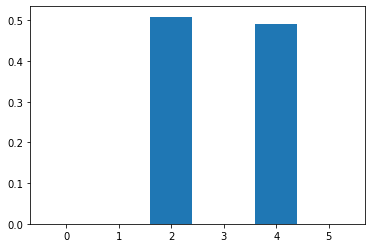

In [19]:
# Get feature importance
from matplotlib import pyplot
importance = dcreg.feature_importances_
# Summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()